In [46]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sn

In [103]:
gdp = pd.read_csv("../Data/gdp_1947_2019.csv")
monetary_base = pd.read_csv("../Data/monetaryB_1975_2020.csv")
unemploy = pd.read_csv("../Data/unrate_1948_2020.csv")
mprime = pd.read_csv("../Data/mprime_1949_2020.csv")
defaults = pd.read_csv("../Data/defaults_1991_2019.csv")
mortgage_avg = pd.read_csv("../Data/30yearFRMortgageAvg_1971_2020.csv")
s_p = pd.read_csv("../Data/spCaseshiller_1987_2019.csv")
real_estate = pd.read_csv("../Data/RealEstateLoans.csv")
deliquentCommIndust = np.array(pd.read_csv("../Data/delinquencyCommercialIndustrial_1987_2019.csv"))

In [104]:
defaults = np.array(defaults)
gdp = np.array(gdp)
monetary_base = np.array(monetary_base)
mprime = np.array(mprime)
mortgage_avg = np.array(mortgage_avg)
s_p = np.array(s_p)
real_estate = np.array(real_estate)

In [215]:
"""def make_monthly(data):
    new_data = []
    curr_m = 1
    for i in data:
        print(i)
        if i[0] > curr_m:
            curr_m = i[0]
            new_data.append(i)
    return new_data"""

def parse_dates(data, start_date, unsplit = False):
    """takes data and replaces, date strings with integer values"""
    new_data = []
    starting_date = 12*start_date
    for i in data:
        #print(i)
        if i[1] != '.':
            x = i[0].split('-')
            y = 12*int(x[0])+int(x[1]) # number of months
            date_in_months_from_start = y - starting_date
            new_data.append([date_in_months_from_start, float(i[1])])
    
    new_data = [entry for entry in new_data if entry[0]>0] #removes dates before start dates
    
    if unsplit == True:
        return np.array(new_data)
    
    return np.array(new_data)[:,0], np.array(new_data)[:,1]
        
def make_monthly(daily_data):
    """"""
    data_n = parse_dates(daily_data,1987, unsplit = True)
    #print(data_n)
    new_data = []
    curr_month = data_n[0,0]
    for i in data_n:
        if i[0] != curr_month:
            curr_month = i[0]
            new_data.append(i)
    return new_data

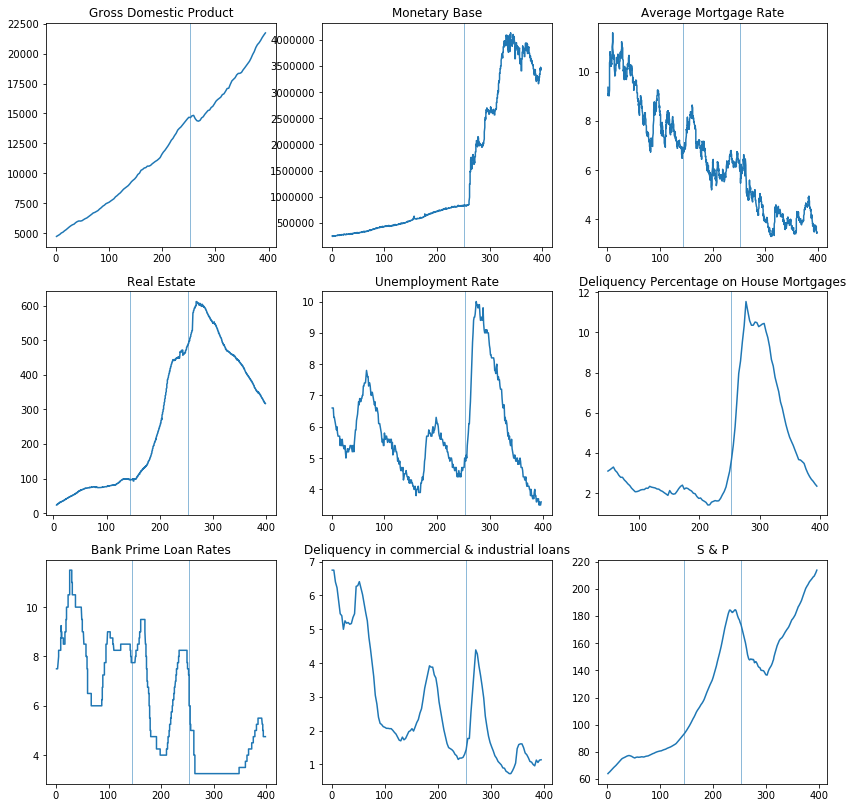

In [236]:

gdp_Y, gdp_X = parse_dates(gdp, 1987)
real_estate_Y, real_estate_X = parse_dates(real_estate, 1987)
monetary_base_Y, monetary_base_X = parse_dates(monetary_base, 1987)
unemploy_Y, unemploy_X = parse_dates(np.array(unemploy), 1987)
defaults_Y, defaults_X = parse_dates(defaults, 1987)
mortAvg_Y, mortAvg_X = parse_dates(mortgage_avg, 1987)
s_p_Y, s_p_X = parse_dates(s_p, 1987)
mprime_Y, mprime_X = parse_dates(mprime, 1987)
deliquentCommIndust_Y, deliquentCommIndust_X = parse_dates(deliquentCommIndust, 1987)

fig, axes = plt.subplots(3,3,figsize=[14,14])

axes[0,0].plot(gdp_Y, gdp_X)
axes[0,0].set_title("Gross Domestic Product")
axes[0,0].axvline(x=252, linewidth = .5)

axes[1,0].plot(real_estate_Y, real_estate_X)
axes[1,0].set_title("Real Estate")
axes[1,0].axvline(x=252, linewidth = .5)
axes[1,0].axvline(x=144, linewidth = .5)

axes[2,0].plot(dprime_Y, dprime_X)
axes[2,0].set_title("Bank Prime Loan Rates")
axes[2,0].axvline(x=252, linewidth = .5)
axes[2,0].axvline(x=144, linewidth = .5)

axes[0,1].plot(monetary_base_Y, monetary_base_X)
axes[0,1].set_title("Monetary Base")
axes[0,1].axvline(x=252, linewidth = .5)

axes[1,1].plot(unemploy_Y, unemploy_X)
axes[1,1].set_title("Unemployment Rate")
axes[1,1].axvline(x=252, linewidth = .5)

axes[2,1].plot(deliquentCommIndust_Y, deliquentCommIndust_X)
axes[2,1].set_title("Deliquency in commercial & industrial loans")
axes[2,1].axvline(x=252, linewidth = .5)

axes[1,2].plot(defaults_Y, defaults_X)
axes[1,2].set_title("Deliquency Percentage on House Mortgages")
axes[1,2].axvline(x=252, linewidth = .5)

axes[0,2].plot(mortAvg_Y, mortAvg_X)
axes[0,2].set_title("Average Mortgage Rate")
axes[0,2].axvline(x=252, linewidth = .5)
axes[0,2].axvline(x=144, linewidth = .5)

axes[2,2].plot(s_p_Y, s_p_X)
axes[2,2].set_title("S & P")
axes[2,2].axvline(x=252, linewidth = .5)
axes[2,2].axvline(x=144, linewidth = .5)

plt.show()

In [221]:
#daaa = pd.read_csv("../Data/DAAA_1983_2020.csv")
t10_yield = pd.read_csv("../Data/t10y2y_1976_2020.csv")
baa10 = pd.read_csv("../Data/baa10y_1986_2020.csv")
dgs30 = pd.read_csv("../Data/DGS30_1977_2020.csv")
consumer_deliq = pd.read_csv("../Data/consumerDeliquency_1987_2019.csv")
consumer_infl = pd.read_csv("../Data/inflation_consumer_price_1960_2018.csv")
cc_defaults = pd.read_csv("../Data/creditCardDefaults_1991_2019.csv")



In [228]:
baa10_monthly = make_monthly(np.array(baa10))
dgs30_monthly = make_monthly(np.array(dgs30))
t10_monthly = make_monthly(np.array(t10_yield))

baa10_monthly_Y = np.array(baa10_monthly)[:,0]
baa10_monthly_X = np.array(baa10_monthly)[:,1]

dgs30_monthly_Y = np.array(dgs30_monthly)[:,0]
dgs30_monthly_X = np.array(dgs30_monthly)[:,1]

t10_monthly_Y = np.array(t10_monthly)[:,0]
t10_monthly_X = np.array(t10_monthly)[:,1]


consumer_deliq_quarterly_Y, consumer_deliq_quarterly_X = parse_dates(np.array(consumer_deliq), 1987)
consumer_infl_monthly_Y, consumer_infl_monthly_X = parse_dates(np.array(consumer_infl), 1987)
cc_defaults_monthly_Y, cc_defaults_monthly_X = parse_dates(np.array(cc_defaults), 1987)

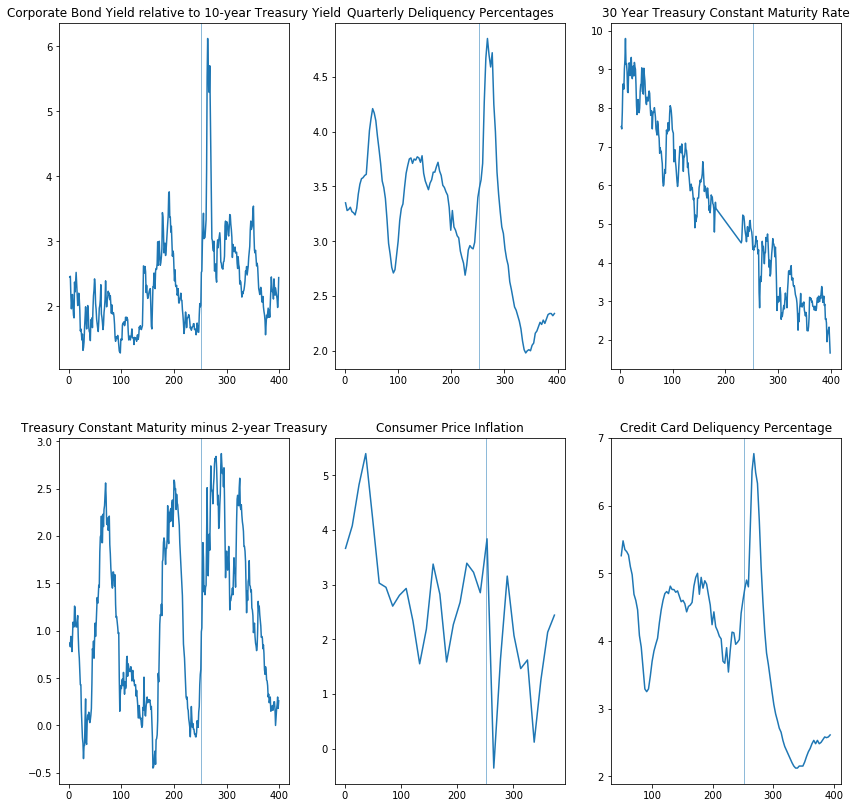

In [230]:
fig1, axes1 = plt.subplots(2,3,figsize=[14,14])

axes1[0,0].plot(baa10_monthly_Y, baa10_monthly_X)
axes1[0,0].set_title("Corporate Bond Yield relative to 10-year Treasury Yield")
axes1[0,0].axvline(x=252, linewidth = .5)

axes1[1,0].plot(t10_monthly_Y, t10_monthly_X)
axes1[1,0].set_title("Treasury Constant Maturity minus 2-year Treasury")
axes1[1,0].axvline(x=252, linewidth = .5)

axes1[0,2].plot(dgs30_monthly_Y, dgs30_monthly_X)
axes1[0,2].set_title("30 Year Treasury Constant Maturity Rate")
axes1[0,2].axvline(x=252, linewidth = .5)

axes1[0,1].plot(consumer_deliq_quarterly_Y, consumer_deliq_quarterly_X)
axes1[0,1].set_title("Quarterly Consumer Deliquency Percentage")
axes1[0,1].axvline(x=252, linewidth = .5)

axes1[1,1].plot(consumer_infl_monthly_Y, consumer_infl_monthly_X)
axes1[1,1].set_title("Consumer Price Inflation")
axes1[1,1].axvline(x=252, linewidth = .5)

axes1[1,2].plot(cc_defaults_monthly_Y, cc_defaults_monthly_X)
axes1[1,2].set_title("Credit Card Deliquency Percentage")
axes1[1,2].axvline(x=252, linewidth = .5)

plt.show()

In [232]:
12*1999-12*1987

144